# Introduction to Python3: Matplotlib

* Es un estándar _de facto_ para visualización grafica de datos en Python
* Pretende ser similara a las funciones de visualización de MATLAB
* Existen diferentes formas de usarla: ```pyplot``` y orientada a objetos

Vamos a utilizar el modo ```inline``` para que las figuras aparezcan incrustadas en el notebook

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Interfaz pyplot

* Función ```plot```: listas o arrays
* Personalizacion de líneas, colores, leyendas
* Otros tipos de gráficas: ```scatter, contour, fill_between```
* Funciones en 1D y 2D
* ```plt.savefig```

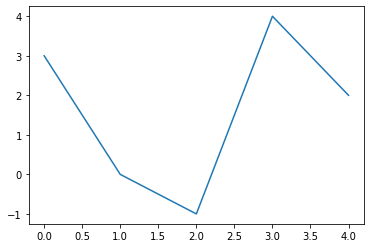

In [3]:
plt.plot([3, 0, -1, 4, 2])

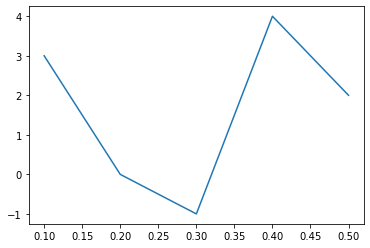

In [4]:
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5], [3, 0, -1, 4, 2])

Se graficará la función $y = e^{-x^2}$

In [5]:
def f(x):
    return np.exp(-x **2)

In [6]:
x = np.linspace(-1, 5, num=40)

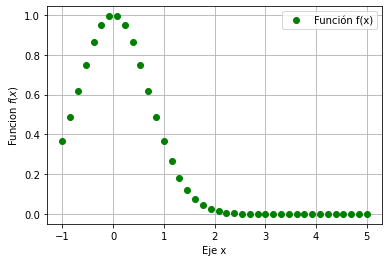

In [7]:
plt.plot(x,f(x), 'og', label='Función f(x)')
plt.xlabel('Eje x')
plt.ylabel('Funcion $f(x)$')
plt.grid(True)
plt.legend()

Desde la ayuda de Jupyter es posible acceder a la página web de ```matplotlib``` donde se puede encontrar una galería extensa del tipo de gráficos que se pueden hacer. Cada ejemplo viene acompañado del código correspondiente.

## Objetos de pyplot

In [ ]:
x

In [ ]:
f(x)

In [ ]:
fig, axes = plt.subplots()
axes.plot(x, f(x), 'ro', label ='Funcion f(x)')
axes.set_xlim(-2,4)
axes.set_ylim(-1,2)
axes.grid(True)
fig.savefig("grafica1.pdf")

In [ ]:
fig, axes = plt.subplots(1,2, sharey=True)
axes[0].plot(x,f(x), color = 'blue')
axes[0].set_xlabel('Eje x izquierda')
axes[1].plot(x,-f(x),'r')
axes[1].set_xlabel('Eje x derecha')
axes[0].grid(True)

## Graficas de dispersión o Scater

Text(0.5, 1.0, '$E=mc^2$')

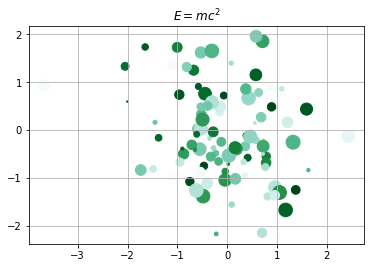

In [8]:
x = np.random.randn(100)  # vector con 100 valores que siguen una distribución N(0, 1)
y = np.random.randn(100)
s = 200* np.random.rand(100) #vector que define el tamaño de los puntos
c = np.random.rand(100)   # vector que define el color de los puntos
plt.scatter(x,y,s,c, cmap=plt.cm.BuGn) #cmap define el mapa de colores
plt.grid(True)
plt.title('$E=mc^2$')

In [ ]:
x = np.random.randn(10)
x

## Referencias

* Documentación de pyplot http://matplotlib.org/api/pyplot_api.html
* Tutorial de matplotlib en español http://pybonacci.wordpress.com/tag/tutorial-matplotlib-pyplot/
* Referencia rápida de matplotlib http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html#quick-references

## Gráficos en 3D

Se desea representar la función $g(x,y)= cos(x) + sin^2(y)$

In [9]:
x = np.linspace(-2,2)
y = np.linspace(-2,2)

xx,yy = np.meshgrid(x,y)

In [10]:
def g(x,y):
    return np.cos(x) + np.sin(y)**2

In [11]:
zz = g(xx,yy)

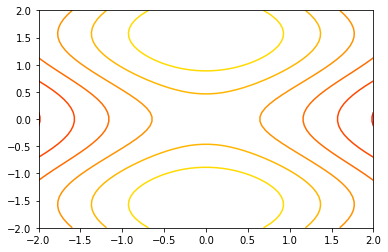

In [12]:
fig , axes = plt.subplots()
axes.contour(xx, yy, zz, cmap = plt.cm.autumn)

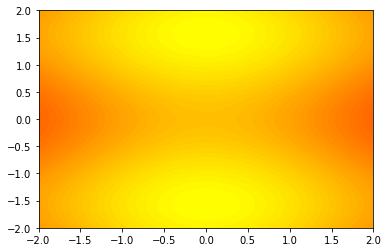

In [13]:
fig, axes = plt.subplots()
axes.contourf(xx, yy, zz, np.linspace (-2,2), cmap = plt.cm.autumn)

## Ejemplo real

Se desea graficar un conjunto de datos contenidos en un archivo externo.
Usamos el archivo _temperaturas.csv_ que tiene como campos STATION, DATE, MAX, MIN

In [14]:
datos = np.loadtxt('temperaturas.csv', usecols=(1,2,3), skiprows=1, delimiter=',')

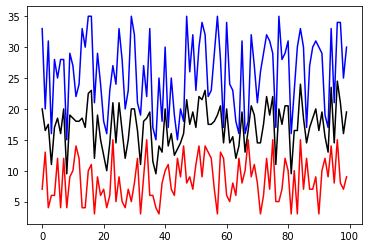

In [15]:
fig, axes = plt.subplots()

# cuenta el número de renglones del archivo
n = len(datos[:, 1])
# contruye un vector en el rango (0,n)
x = np.arange(n)

# grafica las temperaturas máximas
axes.plot(x, datos[:, 1], 'r')
# grafica las temperaturas mínimas
axes.plot(x, datos[:, 2], 'b')
# calcula temperatura media y la grafica
temp_media = (datos[:, 1] + datos[:, 2])/2
axes.plot(x,temp_media, 'k')